In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib  inline 
import seaborn as sns

In [16]:
df = pd.read_csv('toyota_cleaned_dataset.csv')

In [17]:
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,GT86,2016,Manual,24089,Petrol,265,36.2,2.0,16000
1,GT86,2017,Manual,18615,Petrol,145,36.2,2.0,15995
2,GT86,2015,Manual,27469,Petrol,265,36.2,2.0,13998
3,GT86,2017,Manual,14736,Petrol,150,36.2,2.0,18998
4,GT86,2017,Manual,36284,Petrol,145,36.2,2.0,17498
...,...,...,...,...,...,...,...,...,...
5923,PROACE VERSO,2019,Manual,588,Diesel,145,40.4,2.0,24498
5924,PROACE VERSO,2019,Manual,7350,Diesel,145,40.4,2.0,24990
5925,PROACE VERSO,2019,Manual,9441,Diesel,145,40.4,2.0,24450
5926,PROACE VERSO,2019,Manual,6570,Diesel,145,40.4,2.0,23950


In [18]:
df.shape

(5928, 9)

In [121]:
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2017.061301,20946.785788,91.740582,63.185685,1.427249,12019.913185
std,1.425194,15402.180900,70.589027,11.452958,0.390963,4784.985326
min,2014.000000,2.000000,0.000000,32.800000,1.000000,2991.000000
25%,2016.000000,9612.750000,0.000000,56.500000,1.000000,8458.250000
50%,2017.000000,17806.000000,135.000000,65.700000,1.500000,10795.000000
75%,2018.000000,29007.500000,145.000000,69.000000,1.800000,14274.250000
max,2020.000000,142000.000000,265.000000,86.000000,2.500000,25000.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5928 entries, 0 to 5927
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5928 non-null   object 
 1   year          5928 non-null   int64  
 2   transmission  5928 non-null   object 
 3   mileage       5928 non-null   int64  
 4   fuelType      5928 non-null   object 
 5   tax           5928 non-null   int64  
 6   mpg           5928 non-null   float64
 7   engineSize    5928 non-null   float64
 8   price         5928 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 416.9+ KB


In [108]:
df=df[~((df.transmission == "Other"))]

In [109]:
df=df[~((df.fuelType == "Other"))]

In [21]:
df[df.columns[[1,3,5,6,7,8,]]].corr()

,year,mileage,tax,mpg,engineSize,price
year,1.000000,-0.631267,0.600833,-0.264160,-0.086555,0.312256
mileage,-0.631267,1.000000,-0.365160,0.180495,0.235833,-0.164758
tax,0.600833,-0.365160,1.000000,-0.506222,0.030645,0.195996
mpg,-0.264160,0.180495,-0.506222,1.000000,-0.045247,-0.030560
engineSize,-0.086555,0.235833,0.030645,-0.045247,1.000000,0.753388
price,0.312256,-0.164758,0.195996,-0.030560,0.753388,1.000000


# visualization

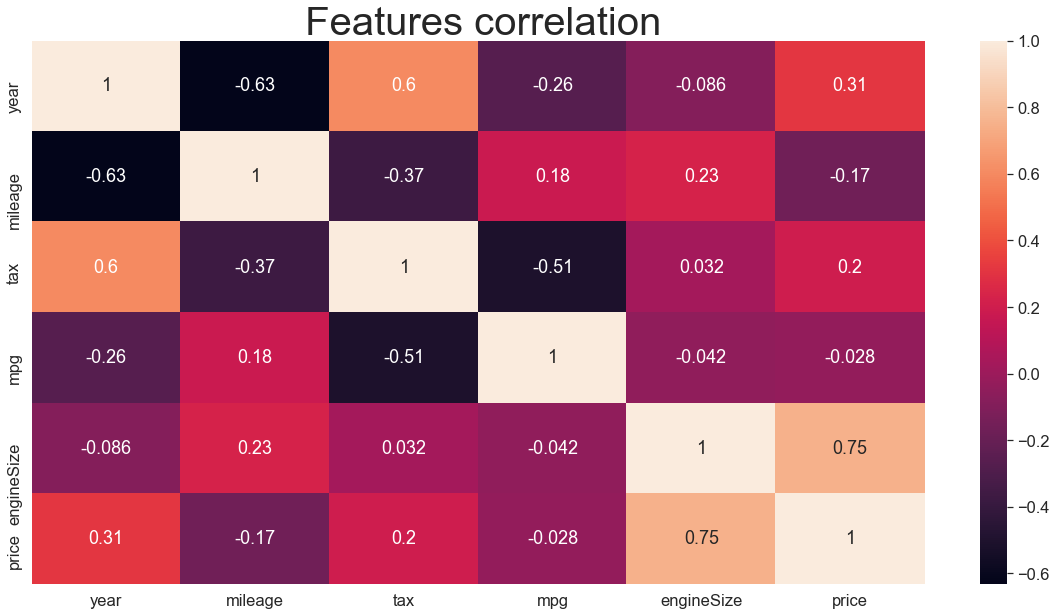

In [120]:
plt.figure(figsize=[20,10])
sns.set(font_scale=1.5)
sns.heatmap(df[df.columns[[1,3,5,6,7,8,]]].corr(),annot=True);
plt.title(' Features correlation', fontsize = 40,);

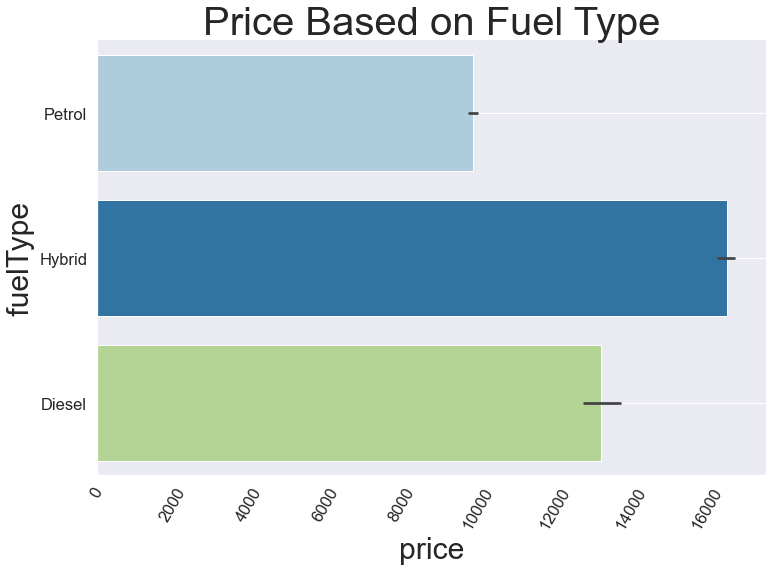

In [47]:
plt.figure(figsize=[12,8])
sns.barplot(x = 'price',y='fuelType',data=df ,palette = sns.color_palette("Paired",4));
plt.xticks(rotation=60)
plt.xlabel("price",fontsize = 30)
plt.ylabel(" fuelType " ,fontsize = 30)
plt.title('Price Based on Fuel Type', fontsize = 40,);

sns.despine()
plt.grid()

In [49]:
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,GT86,2016,Manual,24089,Petrol,265,36.2,2.0,16000
1,GT86,2017,Manual,18615,Petrol,145,36.2,2.0,15995
2,GT86,2015,Manual,27469,Petrol,265,36.2,2.0,13998
3,GT86,2017,Manual,14736,Petrol,150,36.2,2.0,18998
4,GT86,2017,Manual,36284,Petrol,145,36.2,2.0,17498


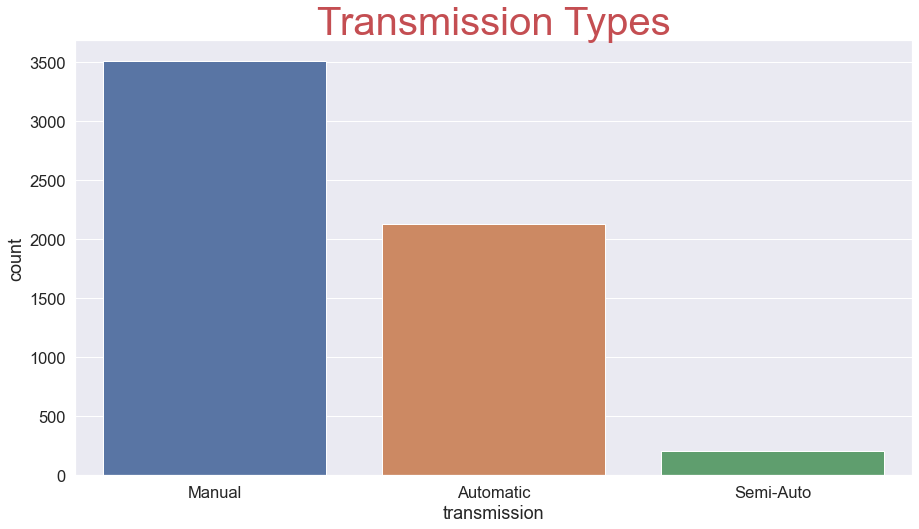

In [96]:
plt.rcParams["font.size"]=(12)
plt.figure(figsize = [15,8])
sns.countplot(x="transmission",data=df,);
plt.title("Transmission Types",fontsize=40,color='r');

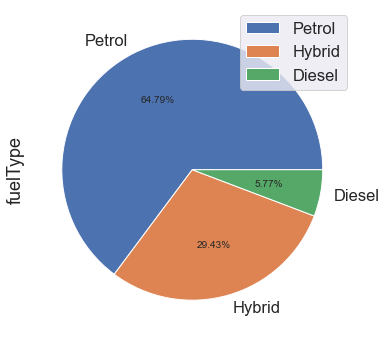

In [94]:
type_counts = df['fuelType'].value_counts()
df1 = pd.DataFrame({'fuelType': type_counts})
df1.plot.pie(y='fuelType', figsize=(6,6), autopct='%1.2f%%');

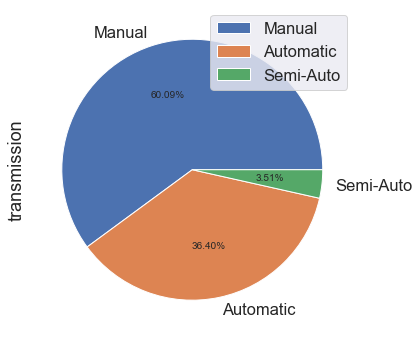

In [115]:
type_counts = df['transmission'].value_counts()
df1 = pd.DataFrame({'transmission': type_counts})
df1.plot.pie(y='transmission', figsize=(6,6), autopct='%1.2f%%');

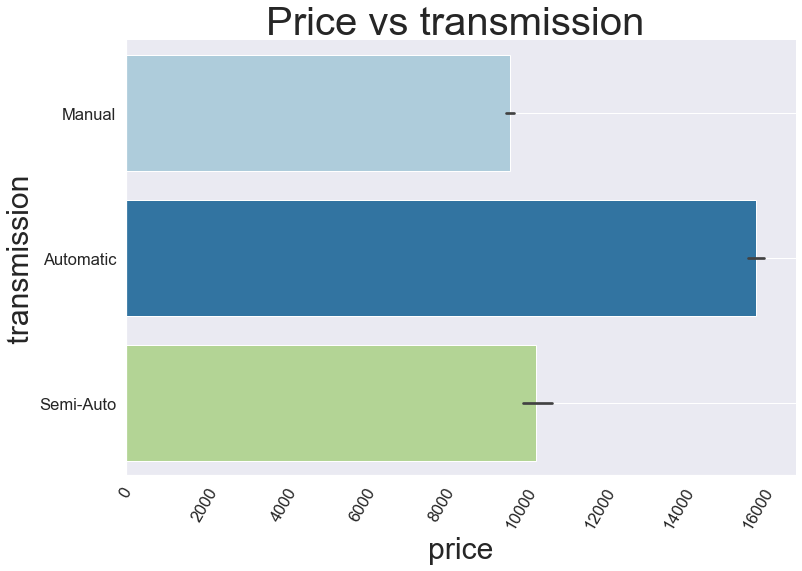

In [111]:
plt.figure(figsize=[12,8])
sns.barplot(x = 'price',y='transmission',data=df ,palette = sns.color_palette("Paired",4));
plt.xticks(rotation=60)
plt.xlabel("price",fontsize = 30)
plt.ylabel(" transmission " ,fontsize = 30)
plt.title('Price vs transmission ', fontsize = 40,);

sns.despine()
plt.grid()

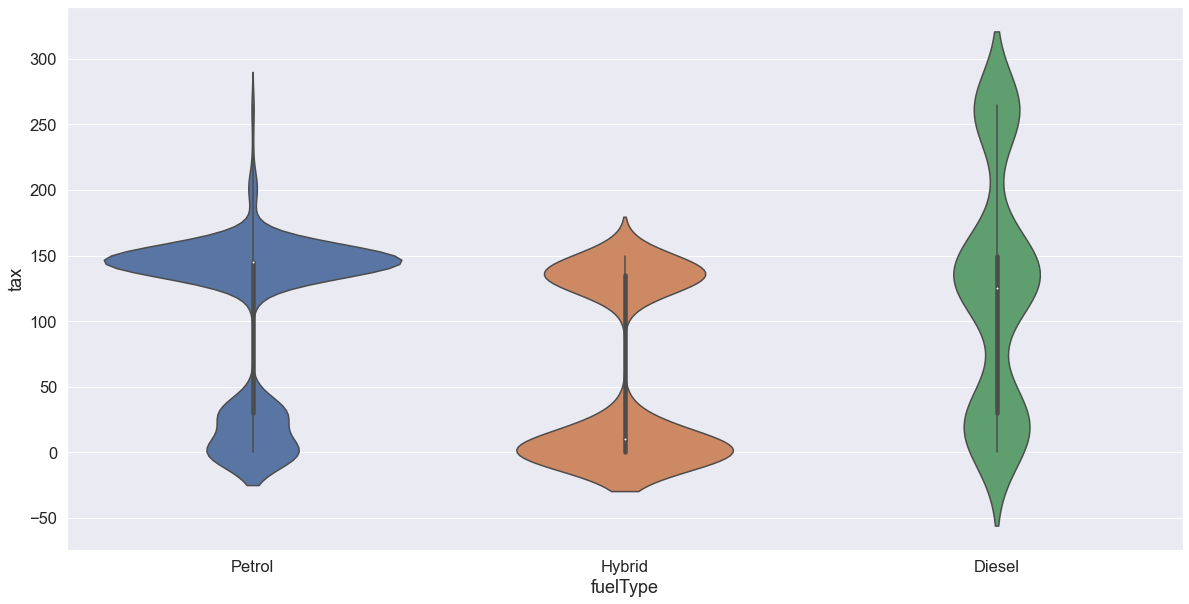

In [105]:
plt.figure(figsize=[20,10])

sns.violinplot(x = 'fuelType',y = 'tax',data = df);